In [35]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import seaborn as sns
from tqdm import tqdm
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
font_path = './AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname=font_path).get_name()

In [2]:
# 고객 및 주거래계좌 정보(CUS_INFO.CSV)
cus_info = pd.read_csv('cus_info.csv')

# 종목정보(IEM_INFO.CSV)
iem_info = pd.read_csv('iem_info_20210902.csv')

# 국내주식 잔고이력(STK_BNC_HIST.CSV) _ 잔고정보 (국내 주식건에 한해) <- 여기세 종목 정보 들어있음
stk_bnc_hist = pd.read_csv('stk_bnc_hist.csv')

# 국내주식 보유기간(STK_HLD_.CSV)
stk_hld_test = pd.read_csv('stk_hld_test.csv')
stk_hld_train = pd.read_csv('stk_hld_train.csv')

# submission file
submission = pd.read_csv('sample_submission.csv')

In [3]:
train = stk_hld_train.copy()
test = stk_hld_test.copy()

In [6]:
cus= cus_info.copy()
iem= iem_info.copy()
hist = stk_bnc_hist.copy()

In [7]:
# 고객 및 주거래계좌 정보
cus.columns=["계좌 ID","성별","연령대","투자성향","자산구간","주거래상품군","Life Style","서비스 등급","총 투자기간","주거래업종구분"]
# 종목정보
iem.columns= ["종목코드","종목한글명","종목업종", "시가총액 규모유형","시장구분"]
# 국내주식 잔고이력
hist.columns= ["계좌 ID","기준일자","종목코드","잔고수량","잔고금액","주당 액면가"]
# 국내주식 보유기간
train.columns=["계좌 ID","종목코드","매수일자","보유기간(일)"]
test.columns=["계좌 ID","종목코드","매수 일자","과거 보유일","제출ID","보유기간(일)"]

In [105]:
hist

,계좌 ID,기준일자,종목코드,잔고수량,잔고금액,주당 액면가
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,A008770,40.0,2828000.0,5000.0
1,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A008770,20.0,1390000.0,5000.0
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20160104,A005940,311.0,2982490.0,5000.0
3,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200814,A005930,40.0,2320000.0,100.0
4,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A005930,20.0,1028000.0,100.0
...,...,...,...,...,...,...
2573834,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200806,A035720,1.0,364000.0,500.0
2573835,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200813,A035720,0.0,0.0,500.0
2573836,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200819,A035720,1.0,376500.0,500.0
2573837,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200825,A035720,0.0,0.0,500.0


In [23]:
train_data = pd.merge(train, cus, how='left', on='계좌 ID')
train_data = pd.merge(train_data, iem, how = "left", on = ["종목코드"])

In [26]:
train_label = train_data["보유기간(일)"]
train_data.drop(["보유기간(일)"], axis = 1, inplace = True)

In [28]:
train_data.head()

,계좌 ID,종목코드,매수일자,성별,연령대,투자성향,자산구간,주거래상품군,Life Style,서비스 등급,총 투자기간,주거래업종구분,종목한글명,종목업종,시가총액 규모유형,시장구분
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,20180726,1,9,3,2,2,9,5,5,8,GS건설,1,1,1
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005930,20180131,1,9,3,2,2,9,5,5,8,삼성전자,9,1,1
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005070,20180517,1,9,3,2,2,9,5,5,8,코스모신소재,12,2,99
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A003520,20201112,1,9,3,2,2,9,5,5,8,영진약품,8,2,1
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A002310,20180905,1,9,3,2,2,9,5,5,8,아세아제지,10,3,99


# cus_info

In [31]:
hist['계좌 ID'].nunique()

9992

In [33]:
cus

,계좌 ID,성별,연령대,투자성향,자산구간,주거래상품군,Life Style,서비스 등급,총 투자기간,주거래업종구분
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...
9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16
9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,2,3,1,2,2,9,1,16
9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16
9998,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,1,5,99,5,2,5,3,2,5


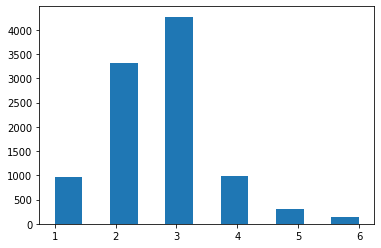

In [51]:
plt.hist(cus['총 투자기간'], bins=11)
plt.show()

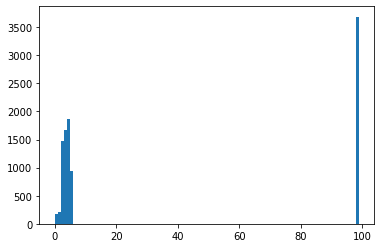

In [58]:
plt.hist(cus['투자성향'], bins=100)
plt.show()

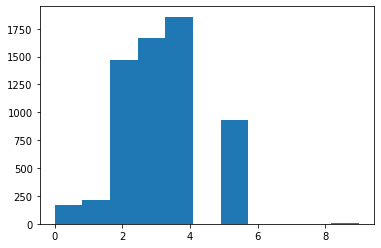

In [57]:
plt.hist(cus[cus['투자성향']!= 99]['투자성향'] , bins=11) # 미제공 3687명 제외, 제공미동의 171명 제외
plt.show()

In [59]:
cus[cus['투자성향']==00] #미제공, 미동의

,계좌 ID,성별,연령대,투자성향,자산구간,주거래상품군,Life Style,서비스 등급,총 투자기간,주거래업종구분
134,b24fa43196a6ad0c3e9d51c25f3efb47aa41c539ce0d75...,2,8,0,2,2,6,5,6,12
146,dbf0089ffed2ddb50d2671ebf577b266191e77e5c83cba...,1,6,0,4,2,5,4,4,10
187,786718e1a53ea36df2a7a98b938c396c2a7610e02daad6...,2,3,0,4,2,4,4,4,10
200,f7f9f2dc89d6cc235f30caa632e05ba4ef52c331ef60e0...,1,3,0,2,2,3,5,3,16
270,c5cb1468fd7ba62c082466df657e5de332a4f731fcb226...,1,9,0,5,2,9,4,4,9
...,...,...,...,...,...,...,...,...,...,...
9825,ee0518eca981140ba4df3363a3e70f74c77d27ac88aec3...,1,5,0,2,2,5,4,2,10
9887,66e29a3f4465f0f1fae9f17b3901cac22c4ae39e19d4ae...,2,9,0,4,2,9,4,2,9
9902,68f10360d5a43b2f4867e9d004b54816bb87b5086c1e81...,2,8,0,5,2,8,3,2,10
9970,5cf8917cbc9748f1864a2cc3194d333b650aa82948bcaa...,1,2,0,2,2,2,5,2,2


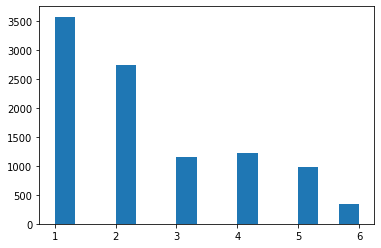

In [75]:
plt.hist(cus['자산구간'], bins=15)
plt.show()

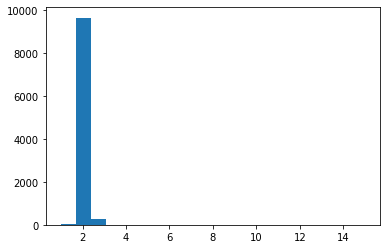

In [80]:
plt.hist(cus['주거래상품군'], bins=20)
plt.show()
# 02 국내주식 9659명
# 그 외([ 8, 11,  3,  6, 12,  1,  5, 15, 10,  9]) 341명

In [82]:
cus[cus['주거래상품군']!=2]

,계좌 ID,성별,연령대,투자성향,자산구간,주거래상품군,Life Style,서비스 등급,총 투자기간,주거래업종구분
3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
43,8abafeb7d5ac212d62b75ae243dc9125476041c0e497b9...,2,7,5,5,11,5,3,5,14
44,73892b4455dc70bacadd1e0c331b0dfa5b8a4a1888bad3...,2,4,3,4,3,4,3,4,16
60,7da5645f7ee3a62a86e04b1de20214c549db9bb8745c7e...,1,3,5,2,3,3,9,1,9
103,bd06f0e93234daa57c911b997f3ce3af62355a4083cec4...,1,2,2,3,3,2,4,3,9
...,...,...,...,...,...,...,...,...,...,...
9886,20a0ea2ad8e4924a33842a24b5317fbdbf94213f36e05f...,1,3,2,2,3,3,5,1,9
9900,5fb3a905adf7514706217ecc06e018b88b75485c2beb5f...,1,4,4,5,3,3,3,2,8
9901,054715cbd18a169ccaf178b18ce1b4a070cde37b469f57...,2,6,3,4,10,5,4,6,16
9917,4772d083ce1190b1f6de595661ab5f9dcd8a8eb0c09b37...,1,8,3,6,3,5,2,2,9


In [79]:
cus['주거래상품군'].unique()

array([ 2,  8, 11,  3,  6, 12,  1,  5, 15, 10,  9])

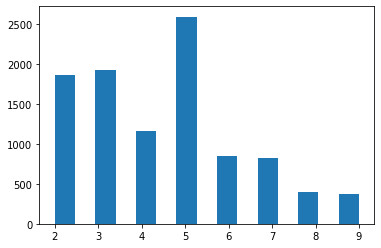

In [85]:
plt.hist(cus['Life Style'], bins=15)
plt.show()

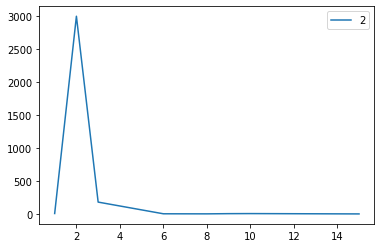

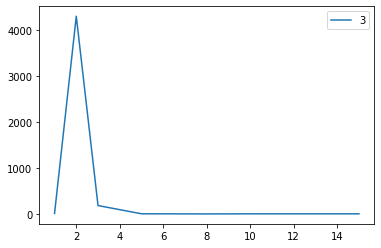

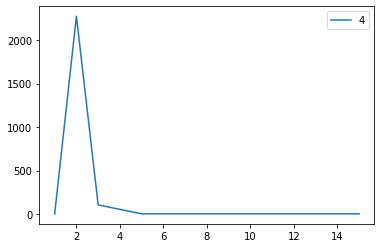

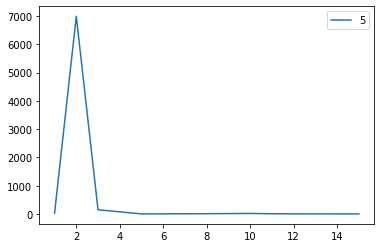

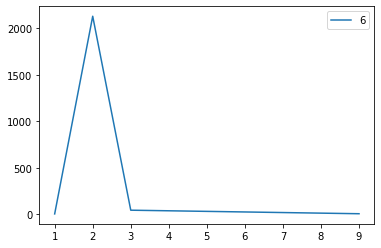

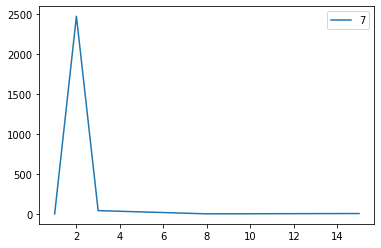

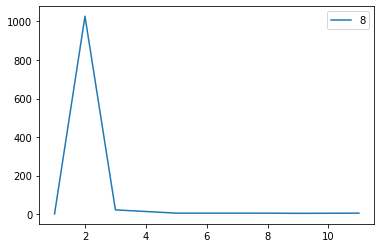

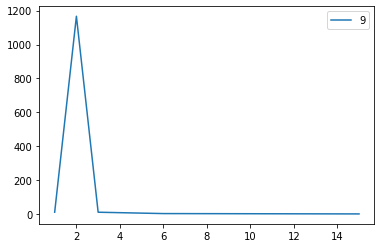

In [94]:
temp = cus.groupby(['Life Style','주거래상품군']).sum().reset_index()
for i in sorted(set(temp['Life Style'])):
    plt.plot(temp[temp['Life Style']==i]['주거래상품군'],temp[temp['Life Style']==i]['자산구간'], label=i)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

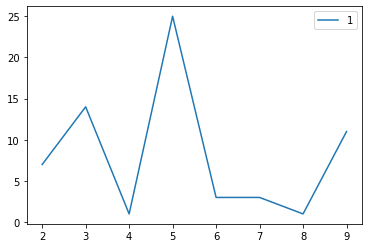

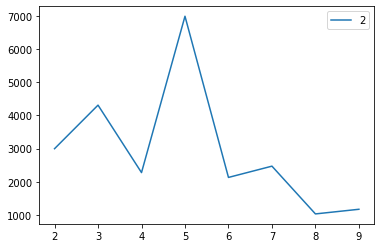

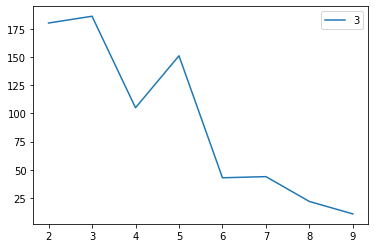

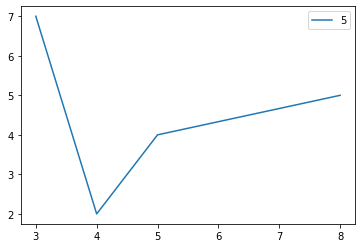

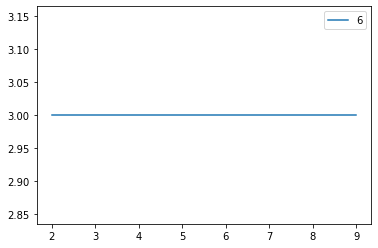

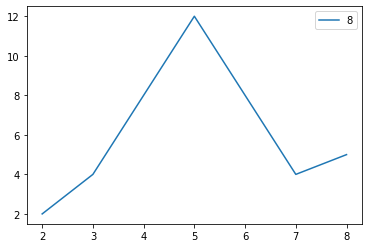

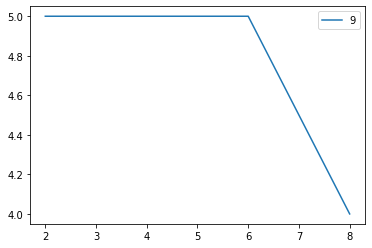

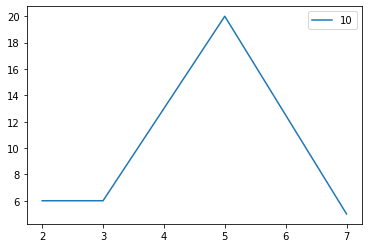

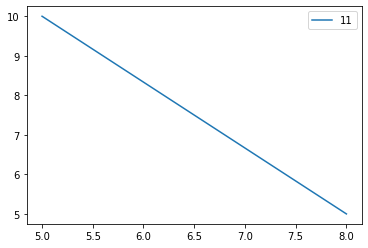

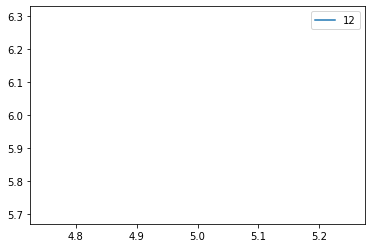

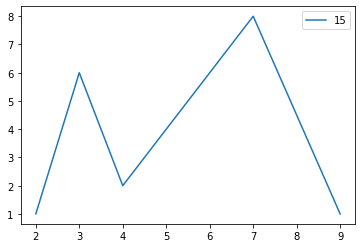

In [96]:
temp = cus.groupby(['주거래상품군', 'Life Style']).sum().reset_index()
for i in sorted(set(temp['주거래상품군'])):
    plt.plot(temp[temp['주거래상품군']==i]['Life Style'],temp[temp['주거래상품군']==i]['자산구간'], label=i)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

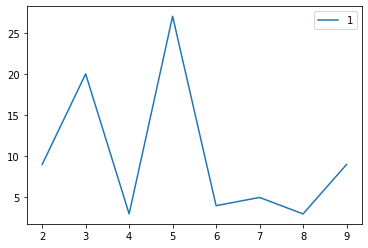

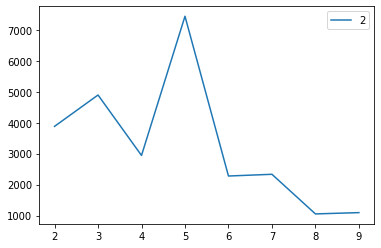

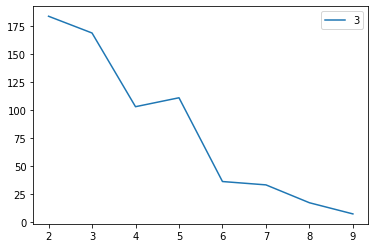

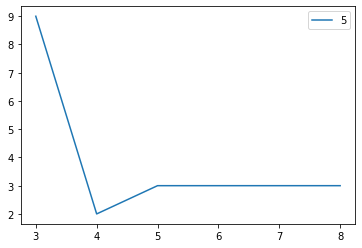

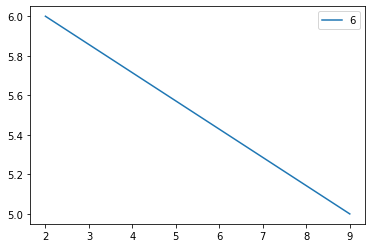

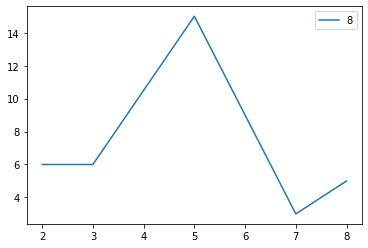

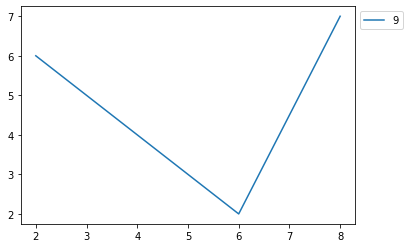

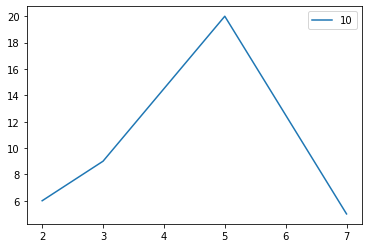

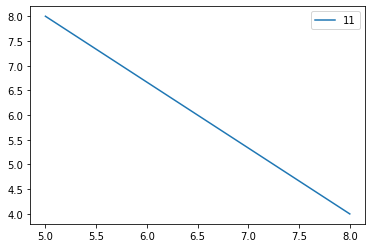

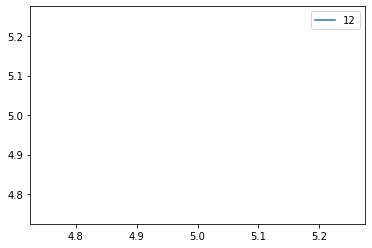

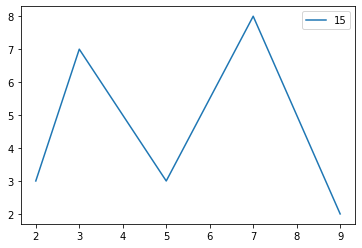

In [99]:
temp = cus.groupby(['주거래상품군', 'Life Style']).sum().reset_index()
for i in sorted(set(temp['주거래상품군'])):
    plt.plot(temp[temp['주거래상품군']==i]['Life Style'],temp[temp['주거래상품군']==i]['총 투자기간'], label=i)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

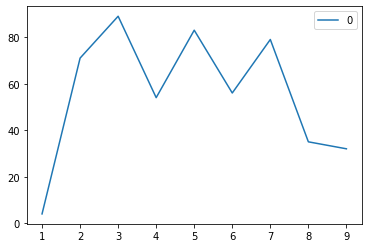

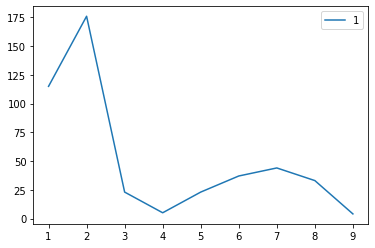

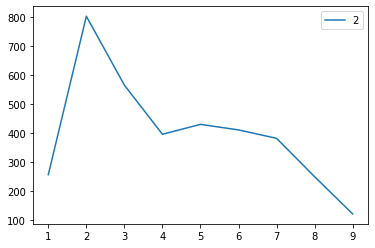

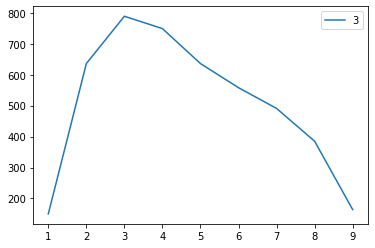

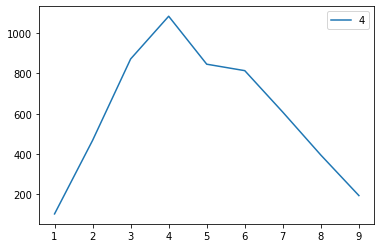

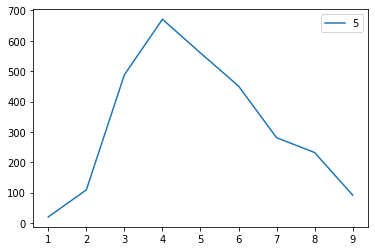

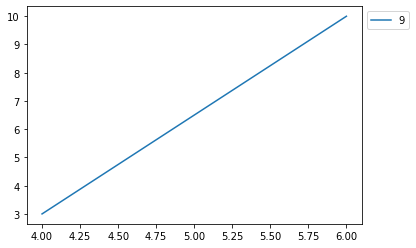

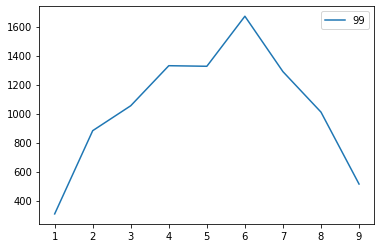

In [100]:
temp = cus.groupby(['투자성향', '연령대']).sum().reset_index()
for i in sorted(set(temp['투자성향'])):
    plt.plot(temp[temp['투자성향']==i]['연령대'],temp[temp['투자성향']==i]['총 투자기간'], label=i)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

In [101]:
cus

,계좌 ID,성별,연령대,투자성향,자산구간,주거래상품군,Life Style,서비스 등급,총 투자기간,주거래업종구분
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...
9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16
9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,2,3,1,2,2,9,1,16
9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16
9998,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,1,5,99,5,2,5,3,2,5


In [102]:
iem

,종목코드,종목한글명,종목업종,시가총액 규모유형,시장구분
0,A000020,동화약품,8,2,99
1,A000080,하이트진로,14,2,1
2,A000180,성창기업지주,5,3,99
3,A000227,유유제약2우B,8,99,99
4,A000325,노루홀딩스우,2,99,99
...,...,...,...,...,...
3074,A383310,에코프로에이치엔,14,99,99
3075,A385520,KODEX K-미래차액티브,14,99,99
3076,A388280,KBSTAR Fn컨택트대표,14,99,99
3077,A388420,KBSTAR 비메모리반도체액티브,14,99,99


In [103]:
train

,계좌 ID,종목코드,매수일자,보유기간(일)
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,20180726,11
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005930,20180131,80
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005070,20180517,5
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A003520,20201112,22
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A002310,20180905,324
...,...,...,...,...
681467,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A260660,20180831,1
681468,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A271980,20201027,1
681469,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A289080,20181121,1
681470,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A307930,20200214,1


In [104]:
test

,계좌 ID,종목코드,매수 일자,과거 보유일,제출ID,보유기간(일)
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A032640,20200522,153,IDX00001,0
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A160600,20190823,335,IDX00002,0
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A234340,20200611,139,IDX00003,0
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A131760,20200120,236,IDX00004,0
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A293490,20201217,9,IDX00005,0
...,...,...,...,...,...,...
70591,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A000810,20201127,23,IDX70592,0
70592,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A005945,20200731,103,IDX70593,0
70593,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A004740,20170704,858,IDX70594,0
70594,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A001630,20201215,11,IDX70595,0
